# Evaluation Metric

## 학습 목표

* 각 머신러닝 문제는 서로 다른 성능평가 척도(Evaluation Metric)를 가짐.
1. 머신러닝 학습 결과를 평가할 수 있다.
2. Precision과 Recall의 관계를 이해할 수 있다
3. AUC 영역을 통해 모델 간의 퍼포먼스를 비교할 수 있다.

## Loss와 Metric

* Loss : 모델 학습시 학습데이터(train data) 를 바탕으로 계산되어, 모델의 파라미터 업데이트에 활용되는 함수
* Metric : 모델 학습 종료 후 테스트데이터(test data) 를 바탕으로 계산되어, 학습된 모델의 성능을 평가하는데 활용되는 함수
* [Loss vs Accuracy](https://kharshit.github.io/blog/2018/12/07/loss-vs-accuracy)
* Accuracy는 Loss랑 다르게 이산적이기 때문에 파라미터가 학습할 방향을 제시하지 못함

## Confusion Matrix 와 Precision/Recall

<img src="ConfusionMatrix.png" width="40%" height="40%">

* True Positive (TP) - 모델이 양성(Positive)을 양성으로 맞혔을 때
* True Negative (TN) - 모델이 음성(Negative)을 음성으로 맞혔을 때
* False Positive (FP) - 모델이 음성(Negative)을 양성(Positive)으로 잘못 예측했을 때
* False Negative (FN) - 모델이 양성(Positive)을 음성(Negative)으로 잘못 예측했을 때
* Accuracy = (TP + TN) / (TP + TN + FP + FN)
* Precision = TP / (TP + FP)
* Recall = TP / (TP + FN)
* Fb_score(F beta score) = (1 + b<sup>2</sup>) * (precision * recall) / ((b<sup>2</sup> * precision) + recall)
* F1_score = 2 * (precision * recall) / (precision + recall)
* Precision 보다 Recall을 좀더 중요시하고 싶다면 beta(b) 값을 크게 하기

## Threshold의 변화에 따른 모델 성능

특정 기준선(Threshold)을 넘어가면 정답이라고 보고 성능을 측정

### 데이터 불러오기

In [1]:
from sklearn import datasets

from sklearn.model_selection import train_test_split
import numpy as np

iris = datasets.load_iris()
X = iris.data
y = iris.target

print(X.shape)  # 4개의 feature를 가진 150개의 데이터입니다.

(150, 4)


### Task 재구성

붓꽃 예제는 너무 간단하니 노이즈를 넣어보겠습니다.

In [2]:
random_state = np.random.RandomState(0)
n_samples, n_features = X.shape
X = np.c_[X, random_state.randn(n_samples, 200 * n_features)]

print(X.shape)  # 804개의 feature를 가진 150개의 데이터가 되었습니다.

(150, 804)


분석을 간단히 하기 위해 binary classification 으로 2개의 라벨간 분류만 해보겠습니다.

In [3]:
#- 0, 1 라벨에 속하는 붓꽃 샘플만 사용하도록 제한합니다.
X_train, X_test, y_train, y_test = train_test_split(X[y < 2], y[y < 2],
                                                    test_size=.5,
                                                    random_state=random_state)

print("훈련, 테스트 셋에 사용된 라벨의 종류: {} ".format( set(y_test)))
print("훈련 데이터 shape   :", X_train.shape)
print("테스트 데이터 shape :", X_test.shape)

훈련, 테스트 셋에 사용된 라벨의 종류: {0, 1} 
훈련 데이터 shape   : (50, 804)
테스트 데이터 shape : (50, 804)


### 모델 학습

* SVM 모델로 학습시킨 후 test 데이터에 넣어보겠습니다.
* classifier.score() 함수는 테스트데이터에 대한 평균 정확도(Accuracy)를 리턴

In [4]:
from sklearn import svm

classifier = svm.SVC(kernel='poly', random_state=random_state)
classifier.fit(X_train, y_train)

classifier.score(X_test,y_test)

0.48

0.48 밖에 안나옵니다. SVM의 kernel = 'poly' 를 'linear'로 바꿔보겠습니다.

In [5]:
classifier = svm.SVC(kernel='linear', random_state=random_state)
classifier.fit(X_train, y_train)

classifier.score(X_test,y_test)

0.8

0.8이 나왔군요, 이제 test 데이터에 대한 결과들을 보겠습니다.

In [6]:
classifier.predict(X_test)

array([0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0,
       0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1,
       0, 1, 1, 1, 0, 1])

In [7]:
y_test

array([1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0,
       0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1,
       0, 1, 1, 0, 1, 0])

In [8]:
y_score = classifier.decision_function(X_test)
print(y_score)

[-0.29512751  0.28798352  0.17635465  0.19056886  0.38391605 -0.30841065
 -0.10084254 -0.23481309  0.18576987 -0.36011033 -0.15726747 -0.25714889
 -0.14979669  0.02063898  0.04509171 -0.17239443  0.07287957 -0.0689103
 -0.13452462 -0.30697712  0.25404241 -0.28916471 -0.52061453  0.25252233
  0.02177777 -0.10980907  0.37468422  0.35303004 -0.6211302  -0.42920064
 -0.14770647  0.00593404 -0.34735296  0.32245409 -0.19439024  0.1288847
 -0.0320947  -0.23008604 -0.10135548 -0.46962186  0.05184235  0.0609688
  0.05632596  0.44769206 -0.38804349  0.24704844  0.16063684  0.0144203
 -0.03136574  0.11179177]


confusion_matrix 계산하기

In [9]:
from sklearn.metrics import confusion_matrix, classification_report

y_pred = classifier.predict(X_test)
conf_mat = confusion_matrix(y_test, y_pred)
print(conf_mat)
rpt_result = classification_report(y_test, y_pred)
print(rpt_result)

[[20  4]
 [ 6 20]]
              precision    recall  f1-score   support

           0       0.77      0.83      0.80        24
           1       0.83      0.77      0.80        26

    accuracy                           0.80        50
   macro avg       0.80      0.80      0.80        50
weighted avg       0.80      0.80      0.80        50



양성 분류 기준을 좀더 확대해서 0보다 큰 값에서 -0.1 보다 큰 값으로 계산합니다.

In [10]:
y_pred_new_threshold = classifier.decision_function(X_test) > -0.1
conf_mat = confusion_matrix(y_test, y_pred_new_threshold)
print(conf_mat)
rpt_result = classification_report(y_test, y_pred_new_threshold)
print(rpt_result)

[[18  6]
 [ 5 21]]
              precision    recall  f1-score   support

           0       0.78      0.75      0.77        24
           1       0.78      0.81      0.79        26

    accuracy                           0.78        50
   macro avg       0.78      0.78      0.78        50
weighted avg       0.78      0.78      0.78        50



-0.2, 0.1, 0.2로 해보겠습니다.

In [11]:
y_pred_new_threshold = classifier.decision_function(X_test) > -0.2
conf_mat = confusion_matrix(y_test, y_pred_new_threshold)
print(conf_mat)
rpt_result = classification_report(y_test, y_pred_new_threshold)
print(rpt_result)

[[12 12]
 [ 2 24]]
              precision    recall  f1-score   support

           0       0.86      0.50      0.63        24
           1       0.67      0.92      0.77        26

    accuracy                           0.72        50
   macro avg       0.76      0.71      0.70        50
weighted avg       0.76      0.72      0.71        50



In [12]:
y_pred_new_threshold = classifier.decision_function(X_test) > 0.1
conf_mat = confusion_matrix(y_test, y_pred_new_threshold)
print(conf_mat)
rpt_result = classification_report(y_test, y_pred_new_threshold)
print(rpt_result)

[[23  1]
 [12 14]]
              precision    recall  f1-score   support

           0       0.66      0.96      0.78        24
           1       0.93      0.54      0.68        26

    accuracy                           0.74        50
   macro avg       0.80      0.75      0.73        50
weighted avg       0.80      0.74      0.73        50



In [13]:
y_pred_new_threshold = classifier.decision_function(X_test) > 0.2
conf_mat = confusion_matrix(y_test, y_pred_new_threshold)
print(conf_mat)
rpt_result = classification_report(y_test, y_pred_new_threshold)
print(rpt_result)

[[24  0]
 [17  9]]
              precision    recall  f1-score   support

           0       0.59      1.00      0.74        24
           1       1.00      0.35      0.51        26

    accuracy                           0.66        50
   macro avg       0.79      0.67      0.63        50
weighted avg       0.80      0.66      0.62        50



##  Precision-Recall 커브

Recall을 X축, Precision을 Y축에 놓고 Threshold에 대한 두 값의 변화를 그래프로 표현

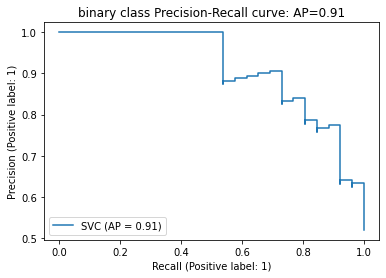

In [14]:
from sklearn.metrics import PrecisionRecallDisplay
import matplotlib.pyplot as plt

disp = PrecisionRecallDisplay.from_estimator(classifier, X_test, y_test)
disp.ax_.set_title('binary class Precision-Recall curve: '
                   'AP={0:0.2f}'.format(disp.average_precision))

plt.show()

* Threshold 와 무관하게 전체적인 성능을 확인하는 법은 그래프 밑의 영역의 넓이를 구하는 것입니다.
* 이를 AUC(Area Under Curve) 라 하며 사이킷 런의 [average_precision_score](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.average_precision_score.html) 로 구할 수 있습니다.
* 다만 이 둘이 완전히 같지는 않고 의미적으로 비슷하게 사용된다고 알고 있으면 됩니다.

In [15]:
from sklearn.metrics import average_precision_score
average_precision = average_precision_score(y_test, y_score)

print('평균 precision-recall score: {0:0.2f}'.format(
      average_precision))

평균 precision-recall score: 0.91


0.91이 나왔습니다. SVM kernel을 다르게 주면 어떻게 될까요?  
[svm.SVC](https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html)

In [16]:
from sklearn.metrics import average_precision_score

classifier = svm.SVC(kernel='poly', random_state=random_state)
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)
y_score = classifier.decision_function(X_test)
average_precision = average_precision_score(y_test, y_score)

print('평균 precision-recall score: {0:0.2f}'.format(
      average_precision))   

평균 precision-recall score: 0.90


Text(0.5, 1.0, 'binary class Precision-Recall curve: AP=0.90')

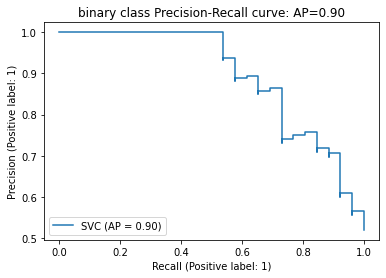

In [17]:
disp = PrecisionRecallDisplay.from_estimator(classifier, X_test, y_test)
disp.ax_.set_title('binary class Precision-Recall curve: '
                   'AP={0:0.2f}'.format(average_precision))

## ROC 커브

* ROC(Receiver Operating Characteristic Curve) : 수신자 조작 특성 곡선
* Confusion Matrix 수치를 활용해 분류기의 분류 능력을 그래프로 표현하는 방법

### ROC 예시 곡선

* ROC를 그리는 축 : TP Rate, FP Rate
* TPR(Sensitivity) : TP / (TP + FN) = Recall
* FPR(1 - Specificity) = FP / (TN + FP) = 음성 샘플에 대한 Recall

### AUC 예시 영역

* ROC AUC(Area Under the ROC Curve) : 해당 영역의 넓이가 넓을수록 상대적으로 좋은 성능
* 사이킷런의 roc_curve, auc 를 통해 쉽게 구할 수 있음

In [18]:
from sklearn.metrics import roc_curve, auc

fpr, tpr, _ = roc_curve(y_test, y_score)
roc_auc = auc(fpr, tpr)
print("🌜    .\n·   *\n  *   *\n🌲 🐕 🌳")

🌜    .
·   *
  *   *
🌲 🐕 🌳


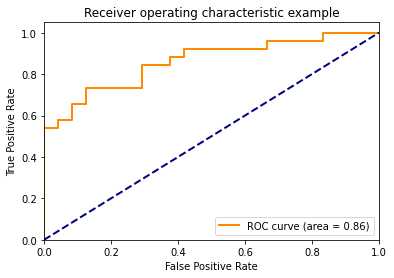

auc result:0.8605769230769231


In [19]:
plt.figure()
lw = 2
plt.plot(fpr, tpr, color='darkorange',
         lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()
print(f"auc result:{roc_auc}")

* 의미있는 분류기라면 적어도 이 파란 점선보다는 위쪽에 그려져야 함.
* 가급적 (0, 1)에 가깝게 그려질 수록 우수한 분류기가 됩니다.
* ROC AUC가 클수록 상대적으로 좋은 성능의 모델이라고 할 수 있을 것입니다

커널 종류를 바꿔서 구해보기

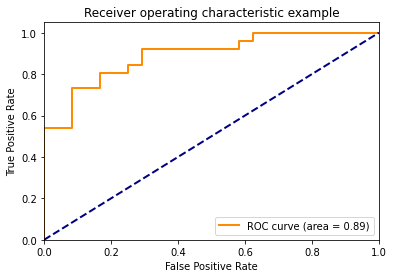

auc result:0.8926282051282052


In [20]:
classifier = svm.SVC(kernel='linear', random_state=random_state)
classifier.fit(X_train, y_train)
y_score = classifier.decision_function(X_test)
fpr, tpr, _ = roc_curve(y_test, y_score)
roc_auc = auc(fpr, tpr)

plt.figure()
lw = 2
plt.plot(fpr, tpr, color='darkorange',
         lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()
print(f"auc result:{roc_auc}")

## 다양한 머신러닝의 평가척도

### 회귀 모델의 평가척도

[회귀 모델의 오류 지표](https://partrita.github.io/posts/regression-error/)
* Mean Absolute Error
* Mean Absolute Percentage Error
* Mean Square Error
* Mean Percentage Error

#### 데이터 불러오기

In [21]:
import pandas as pd
df = pd.read_csv('./data/Video_Games_Sales_as_at_22_Dec_2016.csv').dropna().reset_index()
df.tail()

,index,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
6820,16667,E.T. The Extra-Terrestrial,GBA,2001.0,Action,NewKidCo,0.01,0.00,0.0,0.0,0.01,46.0,4.0,2.4,21.0,Fluid Studios,E
6821,16677,Mortal Kombat: Deadly Alliance,GBA,2002.0,Fighting,Midway Games,0.01,0.00,0.0,0.0,0.01,81.0,12.0,8.8,9.0,Criterion Games,M
6822,16696,Metal Gear Solid V: Ground Zeroes,PC,2014.0,Action,Konami Digital Entertainment,0.00,0.01,0.0,0.0,0.01,80.0,20.0,7.6,412.0,Kojima Productions,M
6823,16700,Breach,PC,2011.0,Shooter,Destineer,0.01,0.00,0.0,0.0,0.01,61.0,12.0,5.8,43.0,Atomic Games,T
6824,16706,STORM: Frontline Nation,PC,2011.0,Strategy,Unknown,0.00,0.01,0.0,0.0,0.01,60.0,12.0,7.2,13.0,SimBin,E10+


Critic_Score 랑 User_Score 만 사용해보겠습니다.

In [22]:
X = df[['Critic_Score','User_Score']].astype('float32')
# X = [tuple(x) for x in subset.values]
# X = list(subset.itertuples(index=False))
sales = df['Global_Sales'].astype('float32')
# y= list(sales.iteritems())
# y = [tuple(x) for x in sales.values]
# print(X.shape, sales.shape)

#### 데이터 시각화

<AxesSubplot:xlabel='Critic_Score', ylabel='Global_Sales'>

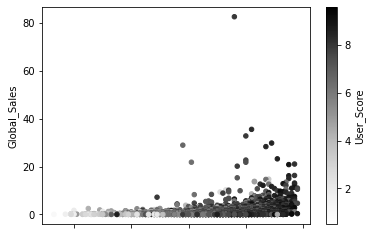

In [23]:
import matplotlib.pyplot as plt
%matplotlib inline

df[['Critic_Score','User_Score',
    'Global_Sales']].astype('float').plot.scatter(x='Critic_Score',
                                                  y='Global_Sales',
                                                  c='User_Score')

#### 선형 회귀

In [25]:
from sklearn.linear_model import LinearRegression
lm = LinearRegression(n_jobs=-1)
lm.fit(X, sales)
y_true = sales.values
y_pred = lm.predict(X)

#### Mean Absolute Error (MAE)

<img src="MAE.jpg" width="50%" height="50%">

MAE = ∑|y−y^| / n
* 절대값을 취하기 때문에 가장 직관적으로 알 수 있는 지표입니다.
* MSE 보다 특이치에 robust합니다.
* 절대값을 취하기 때문에 모델이 underperformance 인지 overperformance 인지 알 수 없습니다.
* underperformance: 모델이 실제보다 낮은 값으로 예측
* overperformance: 모델이 실제보다 높은 값으로 예측

In [27]:
import numpy as np
from sklearn.metrics import mean_absolute_error

def MAE(y_true, y_pred): 
    return np.mean(np.abs((y_true - y_pred)))

print(MAE(y_true, y_pred))
print(mean_absolute_error(y_true, y_pred))

0.76997954
0.76997954


#### Mean Squared Error(MSE)

<img src="MSE.jpg" width="50%" height="50%">


MSE = ∑(y−y^)<sup>2</sup> / n
* 특이치에 민감하다

In [28]:
def MSE(y_true, y_pred):
    return np.mean(np.square((y_true - y_pred)))
from sklearn.metrics import mean_squared_error

print(MSE(y_true, y_pred))
print(mean_squared_error(y_true, y_pred))


3.6227748
3.6227748


#### Root Mean Squared Error(RMSE)

RMSE = Root (∑(y−y^)<sup>2</sup> / n)
* RMSE를 사용하면 오류 지표를 실제 값과 유사한 단위로 다시 변환하여 해석을 쉽게 합니다.

In [29]:
np.sqrt(MSE(y_true, y_pred))

1.9033588

#### Mean Absolute Percentage Error(MAPE)

<img src="MAPE.jpg" width="50%" height="50%">

MAPE = ∑|y−y^ / y| / n * 100%
* MAE와 마찬가지로 MSE보다 특이치에 robust합니다.
* MAE와 같은 단점을 가집니다.
* 추가적으로 모델에 대한 편향이 존재합니다.
  - 이 단점에 대응하기 위해 MPE도 추가로 확인하는게 좋습니다.
  - 0 근처의 값에서는 사용하기 어렵습니다.

In [31]:
def MAPE(y_true, y_pred): 
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

MAPE(y_true, y_pred)

558.8788509368896

#### Mean Percentage Error(MPE)

<img src="MPE.jpg" width="50%" height="50%">

MAE = ∑(y−y^) / n ∗ 100%
* MAPE에서 절대값을 제외한 지표입니다.
* 모델이 underperformance 인지 overperformance 인지 판단 할 수 있다는 것입니다.
* 음수의 값이면 overperformance, 양의 값이면 underperformance

In [32]:
def MPE(y_true, y_pred): 
    return np.mean((y_true - y_pred) / y_true) * 100
MPE(y_true, y_pred)

-468.23267936706543

### 랭킹 모델의 평가척도

* 유튜브의 추천 알고리즘 정도로 생각
* 추천시스템은 넓게 보면 정보 검색(Information Retrieval)과 같은 로직을 가지고 있습니다.
* 이런 모델들이 일반적인 분류모델과 다른 점은, 랭킹(우선순위) 개념이 추가된다는 점입니다
* [링크참고](https://lamttic.github.io/2020/03/20/01.html)

#### MRR(Mean Reciprocal Rank)

* 가장 많이 나온 컨텐츠 중 가장 높은 위치의 역수를 계산한다.
* 선호하는게 k번째 있을때 1/k(앞에 있는게 추천 순위가 높은 것)
* 사용자마다 계산된 점수를 모아 평균을 계산

<img src="MRR.png" width="50%" height="50%">

장점
1. 간단하고 쉽다.
2. 제공된 목록 중 가장 상위의 관련된 컨텐츠에만 집중하기 때문에, 사용자에 가장 관련있는 컨텐츠가 최상위에 있는가를 평가할 때 용이하다.
3. 새로운 컨텐츠가 아니라 이미 사용자가 알고 있는 컨텐츠 중 가장 선호할만한 컨텐츠를 보여주고자 할 때 좋은 평가 기준이 된다.

단점
1. 제공된 목록 중 하나의 컨텐츠에만 집중하기 때문에 나머지 부분에 대해서는 평가하지 않는다.(2, 3번째 관련 컨텐츠에 대해서는 평가를 하지 않는다.)
2. 관련 컨텐츠의 개수가 달라도 첫 번째 관련 컨텐츠의 위치가 같은 경우 같은 점수를 가지므로 변별력을 가지기 어렵다.
3. 사용자가 컨텐츠에 대해 잘 알지 못해 여러 번 탐색을 해야 하는 경우 살펴봐야 하는(관련있는) 컨텐츠의 개수가 1개 이상일 가능성이 높으므로 좋은 평가 기준이 되기 어렵다.

#### MAP

전체 카테고리에 대해 user 별로 좋아하는 카테고리에 대한 점수들의 평균을 구하고  
user 들을 값을 모아 전체 평균을 구한다.  
P = 선호 카테고리 나온 갯수 / 현재 위치

<img src="MAP.png" width="50%" height="50%">

장점
1. 추천 컨텐츠의 단순한 성능을 평가하는 것이 아니라 우선순위를 고려한 성능을 평가할 수 있다.
2. 상위에 있는 오류(관련없는 컨텐츠)에 대해서는 가중치를 더 주고, 하위에 있는 오류에 대해서는 가중치를 적게 주어 관련 컨텐츠가 상위에 오를 수 있도록 도움을 준다.

단점
1. MAP는 관련 여부가 명확하지 않은 경우에는 계산하기 어렵다.
2. 1~5점으로 평가하는 평점같이 관련 여부를 판단하기 어려운 경우는 MAP를 사용하기 어렵다.(4~5점은 관련있다고 판단하더라도 3점은 관련 여부를 판단하기 어려울 것이다.)

#### NDCG

<img src="NDCG.png" width="50%" height="50%">

장점
1. 기존 방법과는 다르게 다양한 관련도에 대한 평가가 가능하다.
2. 이분법적인 관련도에도 뛰어난 성능을 보인다.
3. log 함수를 이용하여 하위 컨텐츠에 대한 영향을 줄임으로써 좋은 성능을 보인다.

단점
1. 사용자와의 관련성을 파악하기 어려운 상황에는 문제의 소지가 있다. 사용자가 컨텐츠에 대한 평가를 하지 않는다면(평점을 입력하지 않는 경우) 해당 관련도를 어떻게 처리해야 할지에 대해 정의해야 한다. 0점 처리해도 문제가 될 것이고, 평균 값을 이용해도 문제가 될 수 있다.
2. 사용자의 관련 컨텐츠가 없다고 판단될 경우, 임의로 NDCG를 0으로 설정해주어야 한다.
3. 보통 K개의 NDCG를 가지고 IR을 평가하는데 IR에서 제공한 컨텐츠가 K보다 부족한 경우, 부족한 관련도를 최소 점수로 채워서 계산해야 한다.

### 이미지 생성 모델의 평가척도

정답과 예측치 사이의 거리를 측정하는 방식.  
[링크 참고](https://medium.com/@datamonsters/a-quick-overview-of-methods-to-measure-the-similarity-between-images-f907166694ee)

* MSE(mean-square error)
  - 픽셀마다의 거리를 구해서 MSE를 구한다.

* PSNR (Peak Signal to Noise Ratio)
1. 모든 픽셀을 bit 형태로 바꿉니다.(8 bit면 0~255)
2. RGB 모델이 PSNR에 가장 알맞다
3. 10 * log10 (R<sup>2</sup>/MSE)
4. 인간이 느끼는걸 수치로 표현한게 아니라서 값이 높게 나온다고 해도 더 화질이 좋아 보이는건 아니다.

* SSIM
1. 사람의 시각에 맞춰 나온 지표(HVS(Human Visual System))
2. SSIM(x,y) = [l(x,y)]<sup>a</sup> * [c(x,y)]<sup>b</sup> * [s(x,y)]<sup>r</sup>
3. l = luminance, c = contrast, s = structural 를 통해 계산
4. 이 역시 또한 지표일뿐 무조건 높다고 더 사람이 화질이 좋아보이는건 아니다.

### 기계번역 모델의 평가척도

BLEU Score

* n-gram을 통한 순서쌍들이 얼마나 겹치는지 측정(precision)
* 문장길이에 대한 과적합 보정 (Brevity Penalty)
* 같은 단어가 연속적으로 나올때 과적합 되는 것을 보정(Clipping)